<a href="https://colab.research.google.com/github/samp3209/wineproject/blob/main/wine_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
df = pd.read_csv('wine - masterinput (3).csv')

In [24]:
df.head(100)

,wine_names,year,price,region,country
6764,"Dom Perignon X Lady Gaga Rose , Limited Editio...",2008.0,999.99,champagne,france
8817,"1989 , Veuve Clicquot , Ponsardin Vintage Brut",1989.0,999.99,champagne,france
2289,"2018 Keller, Morstein Felix Spatburgunder GG A...",2018.0,999.85,Rheinhessen,germany
2290,"2018 Keller, Morstein Felix Spatburgunder GG, ...",2018.0,999.85,Rheinhessen,germany
6765,Egly Ouriet Brut Millesime 2008 [Provenance Gu...,2008.0,999.00,champagne,france
...,...,...,...,...,...
7547,Cotat F. Les Monts Damnes France Dry White San...,2004.0,986.45,loire,france
8753,1991 Trimbach Riesling Clos Ste. Hune,1991.0,985.99,alsace,france
9228,2009 Palari Faro Sicily Italy,NaN,985.00,sicily,italy
6681,Veuve Clicquot Ponsardin La Grande Dame 2008 6...,2008.0,984.00,champagne,france


In [27]:
df = df.sort_values('price', ascending=True)

In [30]:
df['price'] = df['price'].astype('float')

In [40]:
import plotly.express as px

fig = px.scatter(df, x="year", y="price", color="country", hover_name="wine_names", 
                 title="Wine Prices over Time")
fig.update_layout(yaxis_range=[0, 3500]) # set the y-axis range to remove outliers
fig.update_layout(xaxis_range=[1990, 2025]) # set the y-axis range to remove outliers

fig.show()

In [19]:
df.dtypes

wine_names     object
year          float64
price          object
region         object
country        object
dtype: object

In [37]:
fig = px.box(df, x="country", y="price", title="Wine Prices by Country")
fig.update_layout(yaxis_range=[0, 3500]) # set the y-axis range to remove outliers
fig.show()

<Axes: >

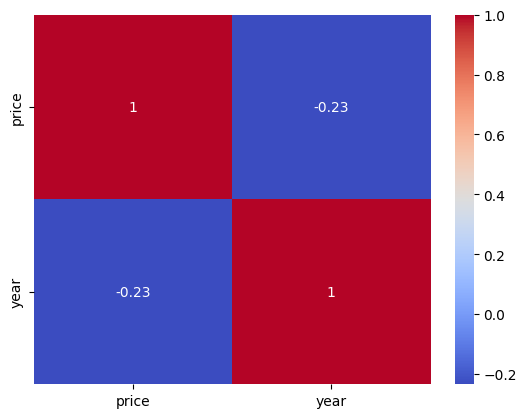

In [43]:
import seaborn as sns

# select the relevant columns and filter the data based on the y and x axis ranges
subset_df = df[(df['price'] < 3500) & (df['year'] >= 1990) & (df['year'] <= 2025)]
subset_df = subset_df[['price', 'year', 'region', 'country']]

# create a correlation matrix
corr_matrix = subset_df.corr()

# create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [47]:

# group the data by country and calculate summary statistics for price and year
country_stats = df.groupby('country').agg({'price': ['mean', 'min', 'max', 'std']})

# display the summary statistics for each country
print(country_stats)

                price                              
                 mean    min       max          std
country                                            
cali       691.465209  30.00  13000.00  1292.611615
france    1550.144722  12.95  59070.80  3998.325493
germany    752.822476   8.00  39347.76  2158.170814
italy      356.715094   5.00  18000.00   813.752746
port       289.274828   4.16   7367.23   710.517422
portugal   204.341233   5.48    702.65   179.450620
